## Prosper Loan Data Exploration
### What factors affect the Borrower's APR?

### Data Wrangling
This data set contains 113,937 rows with 81 variables on each loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others. I will mainly analyse factors that affect the borrower’s APR. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load data into prosper_loan dataset
prosper_loan = pd.read_csv('prosperLoanData (1).csv')

In [3]:
#Read first lines of prosper data
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Overview of dataset
print(prosper_loan.shape)
print(prosper_loan.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

There are 80 columns in the dataset and I am only interested in few features that are more relevant to my analysis.

In [5]:
#Create a list to store necessary columns name
col = ['ListingNumber','Term','LoanStatus','ProsperScore','BorrowerAPR','ListingCategory (numeric)','EmploymentStatus','IsBorrowerHomeowner','CurrentCreditLines','LoanOriginalAmount','CurrentDelinquencies','OpenRevolvingAccounts','TotalInquiries','IncomeRange']

In [6]:
#Select features from prosper data in the col list
df_prosper_loan = prosper_loan[col]
df_prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ProsperScore               84853 non-null   float64
 4   BorrowerAPR                113912 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   CurrentCreditLines         106333 non-null  float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  CurrentDelinquencies       113240 non-null  float64
 11  OpenRevolvingAccounts      113937 non-null  int64  
 12  TotalInquiries             112778 non-null  float64
 13  IncomeRange                11

1. Columns ProsperScore, BorrowerAPR, EmploymentStatus, CurrentCreditLines, CurrentDelinquencies, TotalInquiries, have some null values.
2. Object type columns should be changed into category for analysis purpose.

In [7]:
#Change 'ListingCategory (numeric)' name to ListingCategory
df_prosper_loan = df_prosper_loan.rename(columns={"ListingCategory (numeric)": "ListingCategory"})

In [8]:
#Since listing category in integer check the entries
df_prosper_loan.ListingCategory.value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

In [9]:
#Create a dictionary of listing category, which found on the metadata
listing_category = {0:'Not Available',1:'Debt Consolidataion',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student',6:'Auto',7:'Other',8:'Baby and Adaption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',13:'House Hold Expenses',14:'Large Purchase',15:'Medical',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'} 
  
# Traversing through dataframe values where key matches 
df_prosper_loan.ListingCategory = [listing_category[item] for item in df_prosper_loan.ListingCategory]

In [10]:
df_prosper_loan.ListingCategory.value_counts()

Debt Consolidataion    58308
Not Available          16965
Other                  10494
Home Improvement        7433
Business                7189
Auto                    2572
Personal Loan           2395
House Hold Expenses     1996
Medical                 1522
Taxes                    885
Large Purchase           876
Wedding Loans            771
Vacation                 768
Student                  756
Motorcycle               304
Engagement Ring          217
Baby and Adaption        199
Cosmetic Procedure        91
Boat                      85
Green Loans               59
RV                        52
Name: ListingCategory, dtype: int64

In [11]:
#Drop any null values.
df_prosper_loan = df_prosper_loan.dropna(axis=0, how='any')

In [12]:
df_prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ListingNumber          84853 non-null  int64  
 1   Term                   84853 non-null  int64  
 2   LoanStatus             84853 non-null  object 
 3   ProsperScore           84853 non-null  float64
 4   BorrowerAPR            84853 non-null  float64
 5   ListingCategory        84853 non-null  object 
 6   EmploymentStatus       84853 non-null  object 
 7   IsBorrowerHomeowner    84853 non-null  bool   
 8   CurrentCreditLines     84853 non-null  float64
 9   LoanOriginalAmount     84853 non-null  int64  
 10  CurrentDelinquencies   84853 non-null  float64
 11  OpenRevolvingAccounts  84853 non-null  int64  
 12  TotalInquiries         84853 non-null  float64
 13  IncomeRange            84853 non-null  object 
dtypes: bool(1), float64(5), int64(4), object(4)
memory us

In [13]:
#Convert datatype of ListingCategory into category
df_prosper_loan.ListingCategory = df_prosper_loan.ListingCategory.astype('category')
df_prosper_loan.ListingCategory.value_counts()

Debt Consolidataion    53180
Other                   9218
Home Improvement        6801
Business                5298
Auto                    2237
House Hold Expenses     1996
Medical                 1522
Taxes                    885
Large Purchase           876
Wedding Loans            771
Vacation                 768
Motorcycle               304
Student                  274
Engagement Ring          217
Baby and Adaption        199
Cosmetic Procedure        91
Boat                      85
Green Loans               59
RV                        52
Not Available             20
Name: ListingCategory, dtype: int64

In [14]:
#Convert datatype of IncomeRange into category
df_prosper_loan.IncomeRange = df_prosper_loan.IncomeRange.astype('category')
df_prosper_loan.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [15]:
#Convert datatype of EmploymentStatus into category
df_prosper_loan.EmploymentStatus=df_prosper_loan.EmploymentStatus.astype('category')
df_prosper_loan.EmploymentStatus.value_counts()

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [16]:
#Convert datatype of LoanStatus into category
df_prosper_loan.LoanStatus=df_prosper_loan.LoanStatus.astype('category')
df_prosper_loan.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [17]:
df_prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ListingNumber          84853 non-null  int64   
 1   Term                   84853 non-null  int64   
 2   LoanStatus             84853 non-null  category
 3   ProsperScore           84853 non-null  float64 
 4   BorrowerAPR            84853 non-null  float64 
 5   ListingCategory        84853 non-null  category
 6   EmploymentStatus       84853 non-null  category
 7   IsBorrowerHomeowner    84853 non-null  bool    
 8   CurrentCreditLines     84853 non-null  float64 
 9   LoanOriginalAmount     84853 non-null  int64   
 10  CurrentDelinquencies   84853 non-null  float64 
 11  OpenRevolvingAccounts  84853 non-null  int64   
 12  TotalInquiries         84853 non-null  float64 
 13  IncomeRange            84853 non-null  category
dtypes: bool(1), category(4), float64(5), 

### Structure of the dataset
>Dataset has 84853 rows contain information about the prosper loan application. Here is a quick description of the features chosen for the analysis.
1. Term : The length of the loan expressed in months.
2. LoanStatus : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
3. BorrowerAPR : The Borrower's Annual Percentage Rate (APR) for the loan.
4. ProsperScore : A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.
5. ListingCategory : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
6. EmploymentStatus : The employment status of the borrower at the time they posted the listing.
7. IsBorrowerHomeowner : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
8. CurrentCreditLines : Number of current credit lines at the time the credit profile was pulled.
9. CurrentDeliquencies : Number of accounts delinquent at the time the credit profile was pulled.
10. TotalInquiries : Total number of inquiries at the time the credit profile was pulled.
11. IncomeRange : The income range of the borrower at the time the listing was created.
12. OpenRevolvingAccounts: Number of open revolving accounts at the time the credit profile was pulled.
13. The origination amount of the loan.

### What is/are the main feature(s) of interest in your dataset?
> **I'm most interested in figuring out What factors affects the Borrower’s APR?** 

I reckon applicant's **Prosperscore** directly influence **Borrower's APR** as it represents creditworthiness of an individual. Other features such as **CurrentDelinquencies, CurrentCreditLines, TotalInquries** are reflecting an applicant's ability to payback the loan so these also will influence the variation in **Borrower's APR** among applicants. I'm interested in finding out how an applicant being a **Homeowner and how length** of a loan period affects the **Borrower's APR**.  

## 1. Univariate Exploration

In this section, I am going to investigate distributions of individual variables. This is indeed a preparation to look at the relationships between variables.  


> **Distribution of main feature of interest : Borrower's APR**

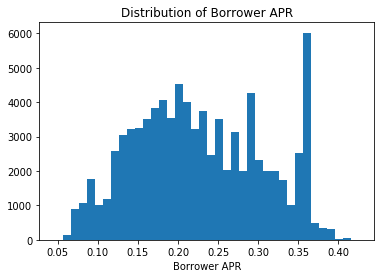

In [18]:
#Plot Histogram for the BorrowerAPR
bins = np.arange(min(df_prosper_loan.BorrowerAPR), max(df_prosper_loan.BorrowerAPR)+0.01, 0.01)
plt.hist(data=df_prosper_loan, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR')
plt.title('Distribution of Borrower APR')
plt.show()


> **Borrowers APR** shows a **unimodal distribution** with APR range from 0.05 to 0.40. But it has a sudden peak in APR for 0.37 with the highest frequency of 6000 applicants. 

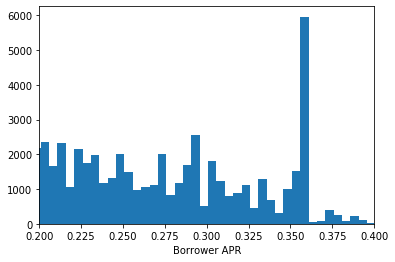

In [19]:
#Let's see a closer look at the distribution spike
bins = np.arange(min(df_prosper_loan.BorrowerAPR), max(df_prosper_loan.BorrowerAPR)+0.005, 0.005)
plt.hist(data=df_prosper_loan, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR')
plt.xlim(0.20,0.4)
plt.show()

>Taking a close look at the pattern in the right side of histogram doesn't show a smooth distribution. There are constant small spikes pointing high. 

> **Distribution of Loan Original Amount**

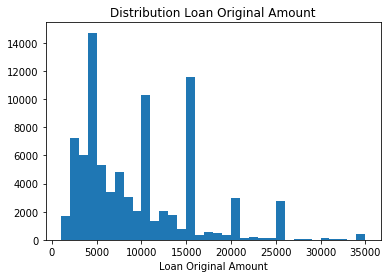

In [20]:
#Plot Histogram for the LoanOriginalAmount
bins = np.arange(min(df_prosper_loan.LoanOriginalAmount), max(df_prosper_loan.LoanOriginalAmount)+1000, 1000)
plt.hist(data=df_prosper_loan, x='LoanOriginalAmount',bins=bins)
plt.xlabel('Loan Original Amount')
plt.title('Distribution Loan Original Amount')
plt.show()

>**Loan original amount** has range of 1000 to 35,000. Distribution is **right skewed** with sudden spikes of frequencies for amounts of 5000, 10,000,15,000,20,000,25,000. Loan amount 5000 has been the most frequently applied amount with 14000 applicants. 

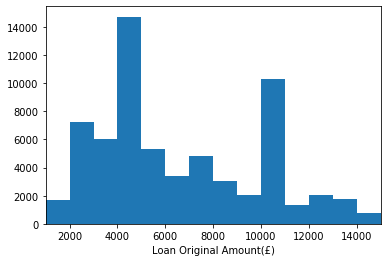

In [21]:
#Closer look at the long spikes of distribution
bins = np.arange(min(df_prosper_loan.LoanOriginalAmount), max(df_prosper_loan.LoanOriginalAmount)+1000, 1000)
plt.hist(data=df_prosper_loan, x='LoanOriginalAmount',bins=bins)
plt.xlabel('Loan Original Amount(£)')
plt.xlim(1000,15000)
plt.show()

In [22]:
# compute the logarithm of price for other modeling and plotting
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [23]:
# compute the logarithm of price for other modeling and plotting
def sqrt_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.sqrt(x)
    else:
        return x**2

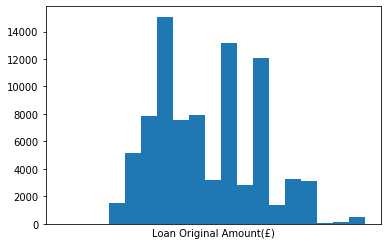

In [24]:
#Log transformated histogram
bin_edges = np.arange(0, sqrt_trans(df_prosper_loan['LoanOriginalAmount'].max())+10,10 )
plt.hist(df_prosper_loan['LoanOriginalAmount'].apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(1000, sqrt_trans(df_prosper_loan['LoanOriginalAmount'].max())+500,500)
plt.xticks(tick_locs,sqrt_trans(tick_locs, inverse = True).astype(int))
plt.xlabel('Loan Original Amount(£)')
plt.show()

> **Distribution of rest of the numeric features.**

In [25]:
#Define a function to plot histogram
def plothist(var):
    """ quick function for plotting histogram """
    plt.figure(figsize=[12, 3])
    bins = np.arange(min(df_prosper_loan[var]), max(df_prosper_loan[var])+0.5, 0.5)
    plt.hist(data=df_prosper_loan, x=var, bins=bins)
    plt.xlabel(var)
    plt.title('Distribution of' + var)
    plt.show()

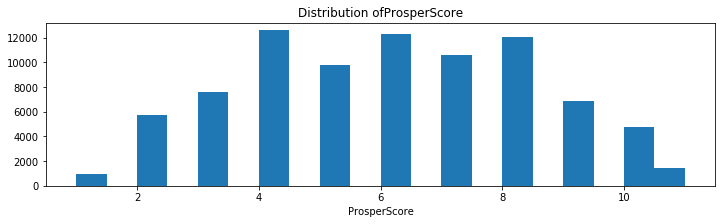

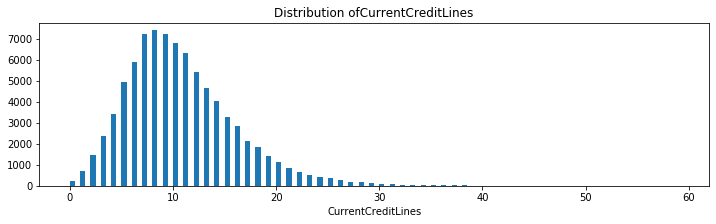

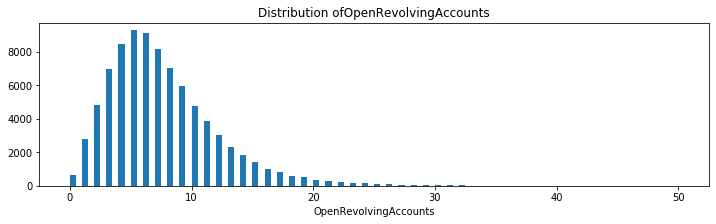

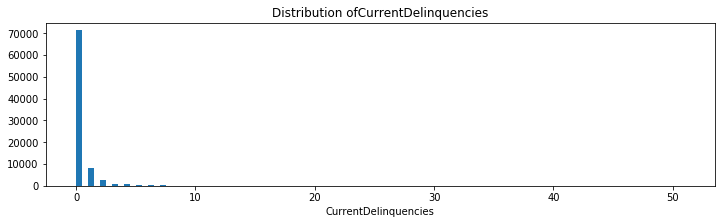

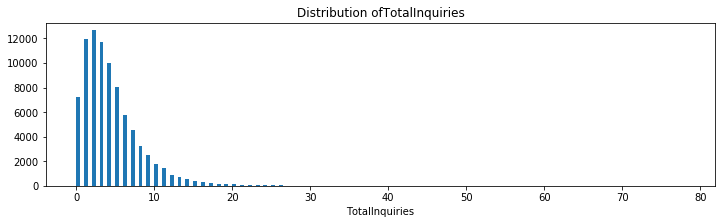

In [26]:
num_variables = ['ProsperScore','CurrentCreditLines', 'OpenRevolvingAccounts', 'CurrentDelinquencies',
                 'TotalInquiries']
#Call function for plot histogram for above numeric features
for var in num_variables:
        plothist(var)


>**ProsperScore, CreditLines and OpenRevolvingAccounts** are **slightly symmetrically distributed** with ranges of 0-11,0-30,0-25 respectively. **CurrentDeliquencies and Totalinquries** are **right skewed** with a tail towards right. So these features should be changed to logarithm transformation for future analysis. **CreditLines and OpenRevolvingAccounts** have a similar distribution this suggests that they are highly correlated.

In [27]:
# Right skewed features put it on a log scale instead
def plothist_log(x):
    """ quick function for logarithm transformation """
    
    plt.figure(figsize=[12, 3])
    bin_edges = np.arange(0, sqrt_trans(df_prosper_loan[x].max())+0.1, 0.1)
    plt.hist(df_prosper_loan[x].apply(sqrt_trans), bins = bin_edges)
    tick_locs = np.arange(0, sqrt_trans(df_prosper_loan[x].max())+10, 10)
    plt.xticks(tick_locs,sqrt_trans(tick_locs, inverse = True).astype(int))
    plt.xlabel(x)
    plt.title('Log Transformation Distribution of '+var)
    plt.show()

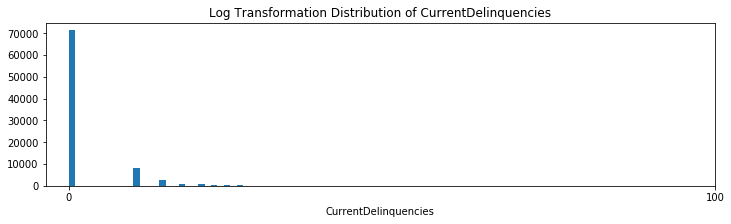

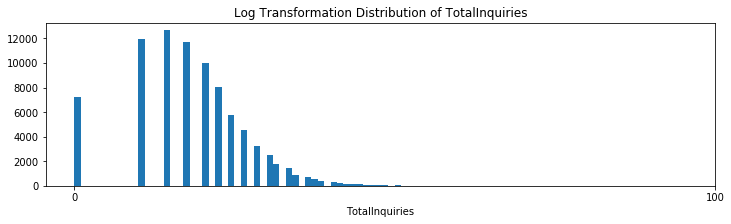

In [28]:
log_var = ['CurrentDelinquencies','TotalInquiries']
for i in range(len(log_var)):
    var = log_var[i]
    plothist_log(var)

> **Countplots for Categorical features**

In [29]:
#Define a function to plot countplots for categorical features
def countplot(y,y_lab,tick_locks_new):
    """" Function to plot coutplots for categorical features"""
    #Sort values of levels in descending order.
    sorted_counts=df_prosper_loan[y].value_counts()
    sorted_order = sorted_counts.index
    
    plt.figure(figsize=[10, 8])
    base_color = sb.color_palette()[0]
    
    plt.subplot(2,1,1)
    sb.countplot(data = df_prosper_loan, y=y, color=base_color,order=sorted_order);
    plt.title('Distribution of '+y)
    
    plt.subplot(2,1,2)
    #Countplot using log transformation
    sb.countplot(data = df_prosper_loan, y=y, color=base_color, order=sorted_order, log=True);
    plt.xticks(tick_locks_new, tick_locks_new)
    plt.ylabel(y_lab)
    plt.title('Log Transformation Distribution of '+y)

> A log transformation countplot has been plotted to show the levels which are too small in the original countplot. Since the log transferred countplot misleading with the values both are presented.

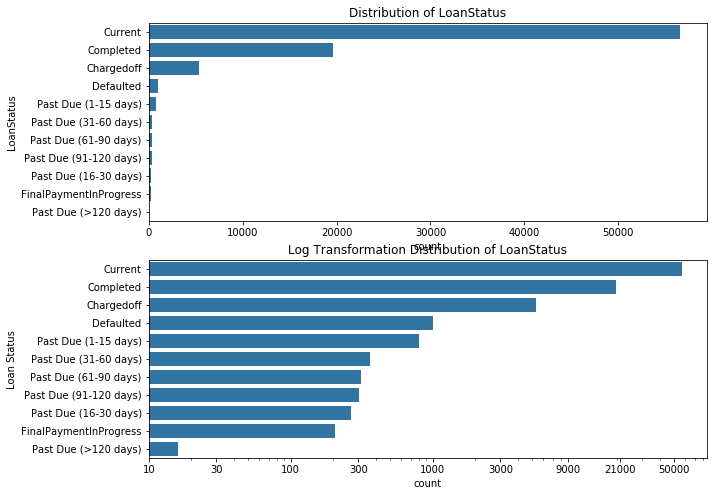

In [30]:
tick_locks_new = [10,30,100,300,1000,3000,9000,21000,50000]
countplot('LoanStatus','Loan Status',tick_locks_new)

>**Loan status current**; which are on process have **higher frequency** of above 50,000 individuals. Status with **Defaulted**, **Past Dues** are **comparitively lower**. There are nearly 250 individuals in **final payment** progress.

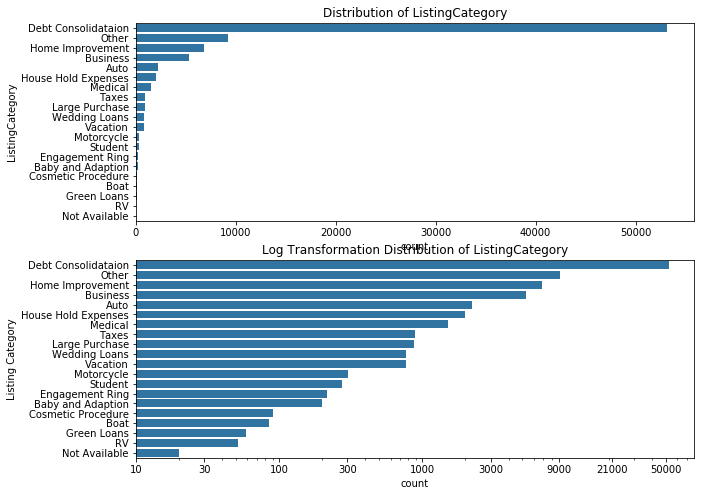

In [31]:
tick_locs_new = [10,30,100,300,1000,3000,9000,21000,50000]
countplot('ListingCategory','Listing Category',tick_locks_new)

> Applicants for **Debt consolidation** are **disproportionatly higher** than other purpose of borrowers  with a frequency above 50,000. 

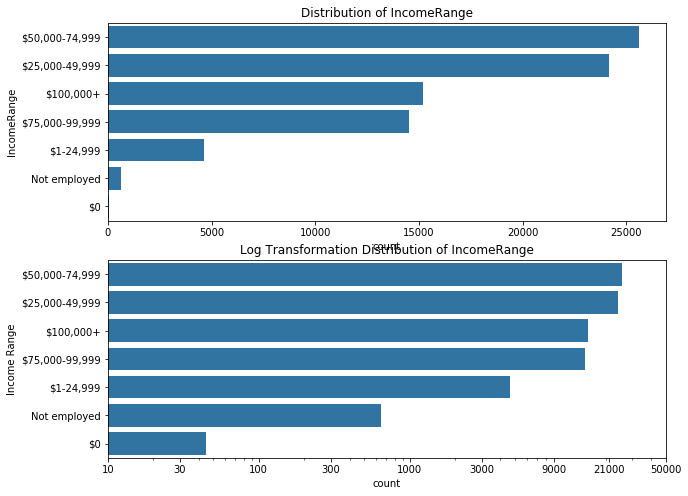

In [32]:
tick_locs_new = [10,30,100,300,1000,3000,9000,15000,25000]
countplot('IncomeRange','Income Range',tick_locks_new)

> Both **Income range 50,000 - 74,999** and **25,000 - 49,999** have a **higher frequency** around **23,000 - 25,000**. I'm intrested to analyse the loan outcome of individuals who are **not employed** and income range of 0.

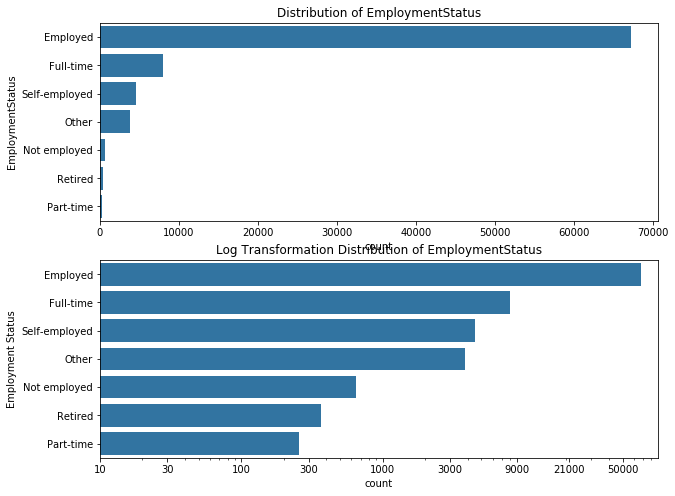

In [33]:
tick_locs_new = [10,30,100,300,1000,3000,9000,15000,30000,60000]
countplot('EmploymentStatus','Employment Status',tick_locks_new)

 >Applicant who are **Employed**  have a **very high frequency** above 65,000 applicants. Suprisingly there are only around 9000 are occupied full time. There are applicants who are **Not employed** and I'm again intrested to analyse their loan outcome and borrowers APR.

In [34]:
#Change boolean values of IsBorrowerHomeowner 
list_new =[]
""" Iterate through IsBorrowerHomeowner and replace boolean values"""
for rows in df_prosper_loan.IsBorrowerHomeowner:
    if rows:
        list_new.append('HomeOwner')
    else:
        list_new.append('Not HomeOwner')
df_prosper_loan['IsHomeowner']=list_new       

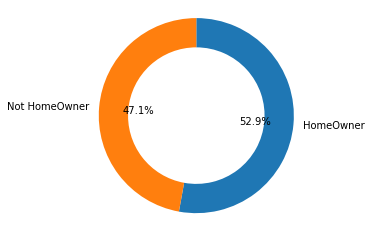

In [35]:
#Construct a  pie chart
sorted_counts=df_prosper_loan.IsHomeowner.value_counts()
sorted_order = sorted_counts.index
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%',wedgeprops = {'width' : 0.3},
        counterclock = False);
plt.axis('square');

> There are 52.9% of **Home owners** have applied for loan. It is interesting to find whether owning a house (mortgage) negatively influence the **BorrowerAPR**.

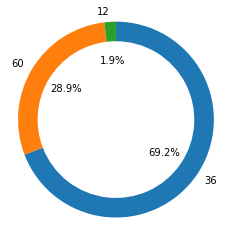

In [36]:
#Construct a  pie chart
sorted_counts=df_prosper_loan.Term.value_counts()
sorted_order = sorted_counts.index
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%',wedgeprops = {'width' : 0.2},
        counterclock = False);
plt.axis('square');

> Loan term for **36** months have larger distribution of **69.2% ** and **12** months only have a 1.9%.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> **Borrower APR** is **slightly symmetrically distributed** very closer to a unimodal, but there is a **higher frequency of distribution** occured in **0.37 Borrower APR**. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> Features like **CurrentDelinquencies and TotalInquiries** are **highly right skewed**, I had to perform a log transformation to make it interpretable. There are so many levels in categorical features and some of them have very small frequencies which were not visible in usual countplots. Log transformation enable to interpret the plot much easier.

## 2. Bivariate Exploration

Analyse the relationship between features chosen, mainly against **BorrowerAPR**. 

In [37]:
categorical_var = ['LoanStatus','ListingCategory','IncomeRange','EmploymentStatus','IsHomeowner']
numerical_var = ['ProsperScore','CurrentCreditLines', 'OpenRevolvingAccounts', 'CurrentDelinquencies','TotalInquiries','BorrowerAPR'
                ,'LoanOriginalAmount']

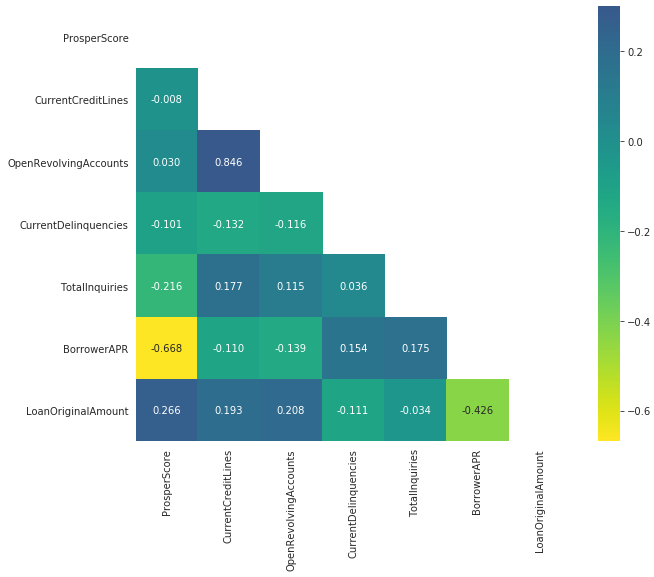

In [38]:
#Correlation heatmap to show the correlation between features
mask = np.zeros_like(df_prosper_loan[numerical_var].corr())
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sb.heatmap(df_prosper_loan[numerical_var].corr(), mask=mask, vmax=.3, annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0, square=True)
plt.show()

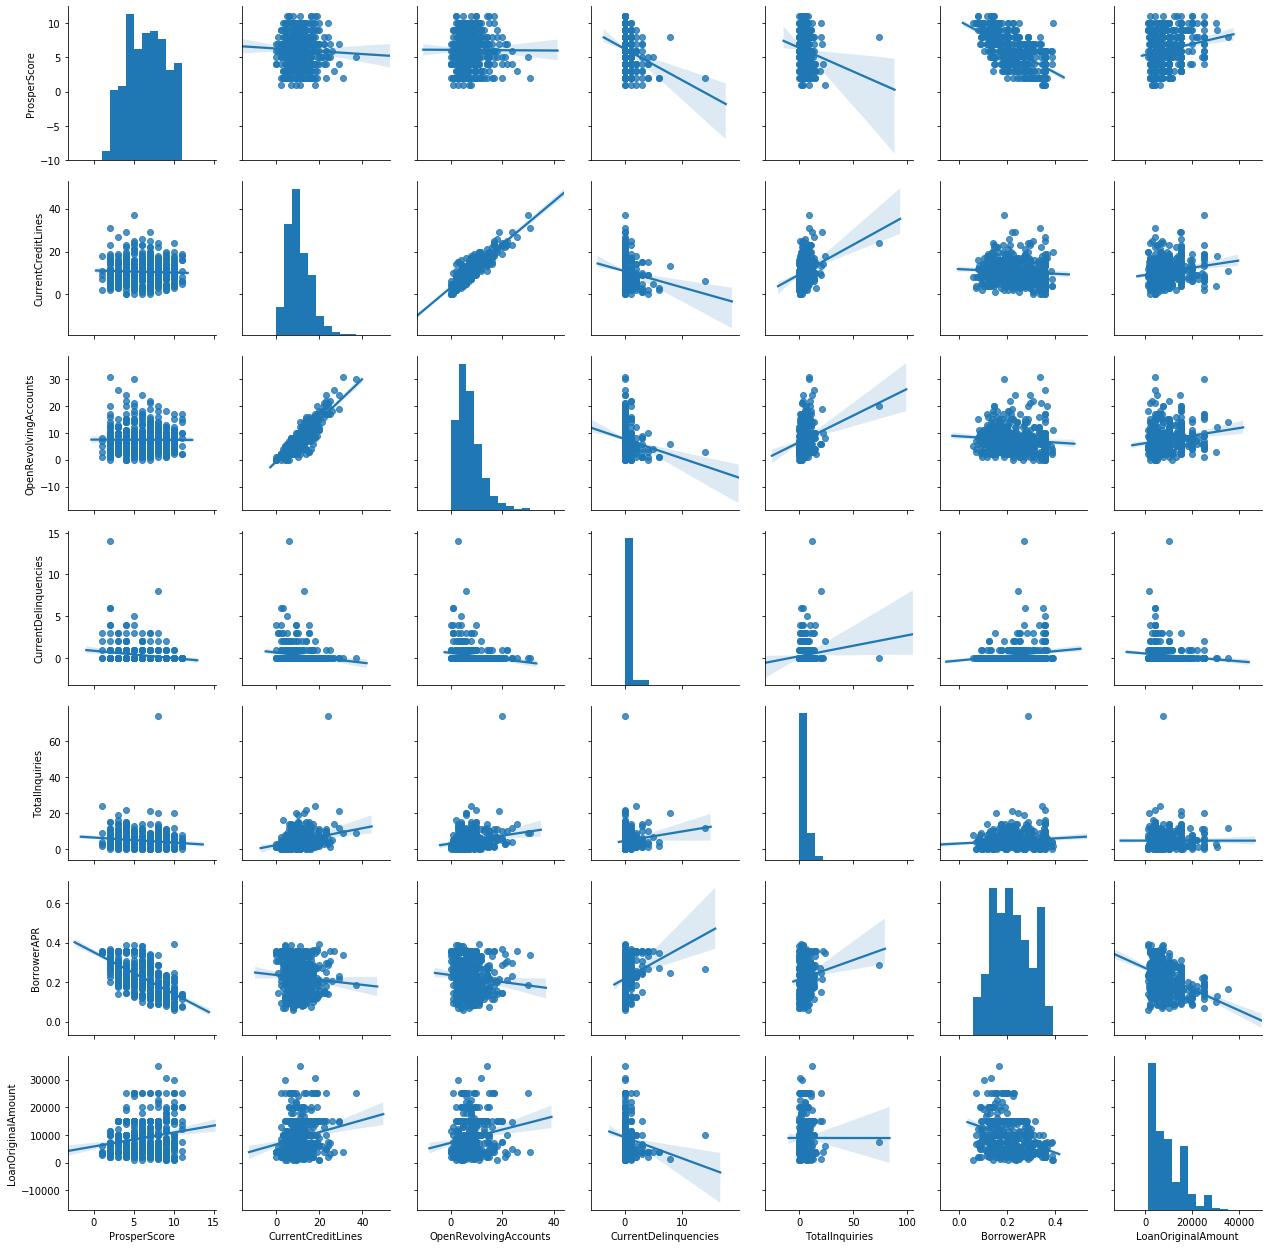

In [39]:
#Choose only 500 rows from the dataset to see a clear pattern
samples = np.random.choice(df_prosper_loan.shape[0], 500, replace = False)
df_sample = df_prosper_loan.iloc[samples,:]
#Plot a pairwise plot to understand the relationship between the numeric variables
g = sb.pairplot(data=df_sample, vars=numerical_var, kind="reg")


To summarise above correlation heatmap and pairplots,
> **Borrower APR** and **Prosper Score** have a **moderate negative linear relationship** with a -66%, which is excpected.  

> Suprisingly,**Current Credit Lines** and **Open Revolving Accounts** have a **week but negative correlationship** with Borrower APR. 

> As expected above pair depicts **Current delinquencies** and **Total Inquiries** have **week positive correlationship** with **Borrower APR**.   

> Also **Borrower APR** has **week negative corelationship** with **Loan Original Amount** with a -42%.

I would like to do a deeper analysis for **Borrower APR** vs **Prosper Score**.

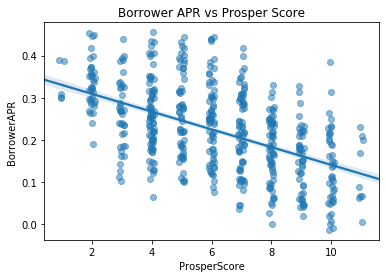

In [40]:
#Scatterplot to have a closer look at the relationship
sb.regplot(data = df_sample, x='ProsperScore', y='BorrowerAPR', fit_reg = True,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/2}).set_title('Borrower APR vs Prosper Score')
plt.show()

> It is apparent there is a moderate **negative linear relationship** with the features. Applicants are concenrated in **2-8 range of Prosper Score**. But for a certain Prosper Score there is a variability of **Borrower APR**, which suggests that **Borrower APR** is widely dependant on other given features. 

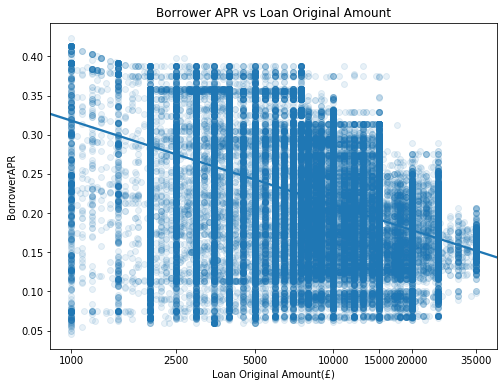

In [42]:
# scatter plot of Borrower APR vs. Loan Origina Amount, with log transform on price axis

plt.figure(figsize = [8, 6])
sb.regplot(df_prosper_loan['LoanOriginalAmount'].apply(log_trans),df_prosper_loan['BorrowerAPR'],scatter_kws = {'alpha' : 0.1}).set_title('Borrower APR vs Loan Original Amount')
tick_locs = [1000,2500,5000,10000,15000,20000,35000]
plt.xticks(log_trans(tick_locs), tick_locs)
plt.xlabel('Loan Original Amount(£)')
plt.show()


>Above scatterplot does **not depicts an obvious linear relationship** between **Borrower APR** and **Loan Original Amount**. But the regplot shows a week **negative correlation**. Again for a certain **Loan original amount**, **Borrower APR** varies among applicants. For instance **Borrower APR** ranges from  0.05 to 0.41 for £1000 loan.

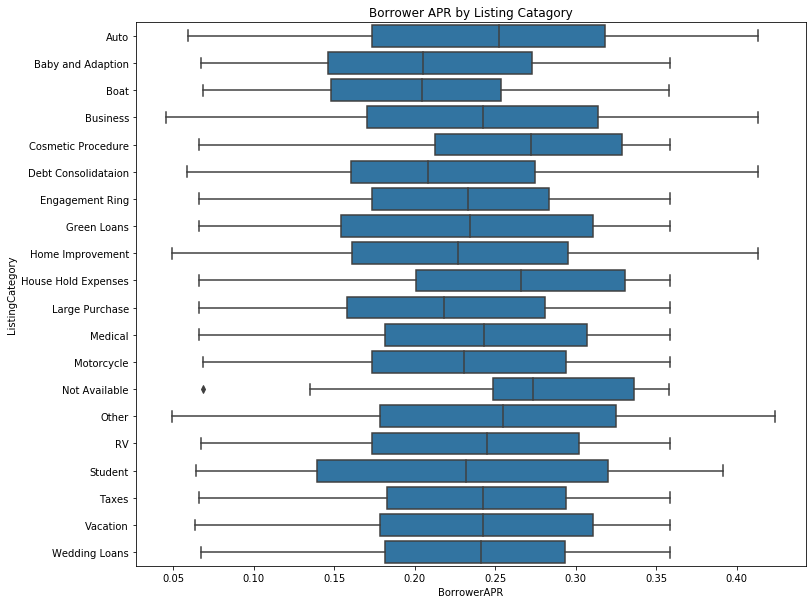

In [43]:
#Plot boxplots for listing Category vs Borrower APR 
fig,axes = plt.subplots(figsize=(12, 10))
base_color = sb.color_palette()[0]
sb.boxplot(y="ListingCategory", x="BorrowerAPR", dodge=False, color = base_color, ax=axes,data = df_prosper_loan).set_title('Borrower APR by Listing Catagory')
plt.show()

>**Auto, Business, Debt Consolidation, Home Improvement and other** types of loan have a comparitively **higher Borrower APR**. Apparently some among these have a lower Borrower APR rate as well for instance **Bussiness loans**. **Baby adaptation and Boat** have a **lower median** rate and **Cosmetic procedure** has a **higher median APR rate**.

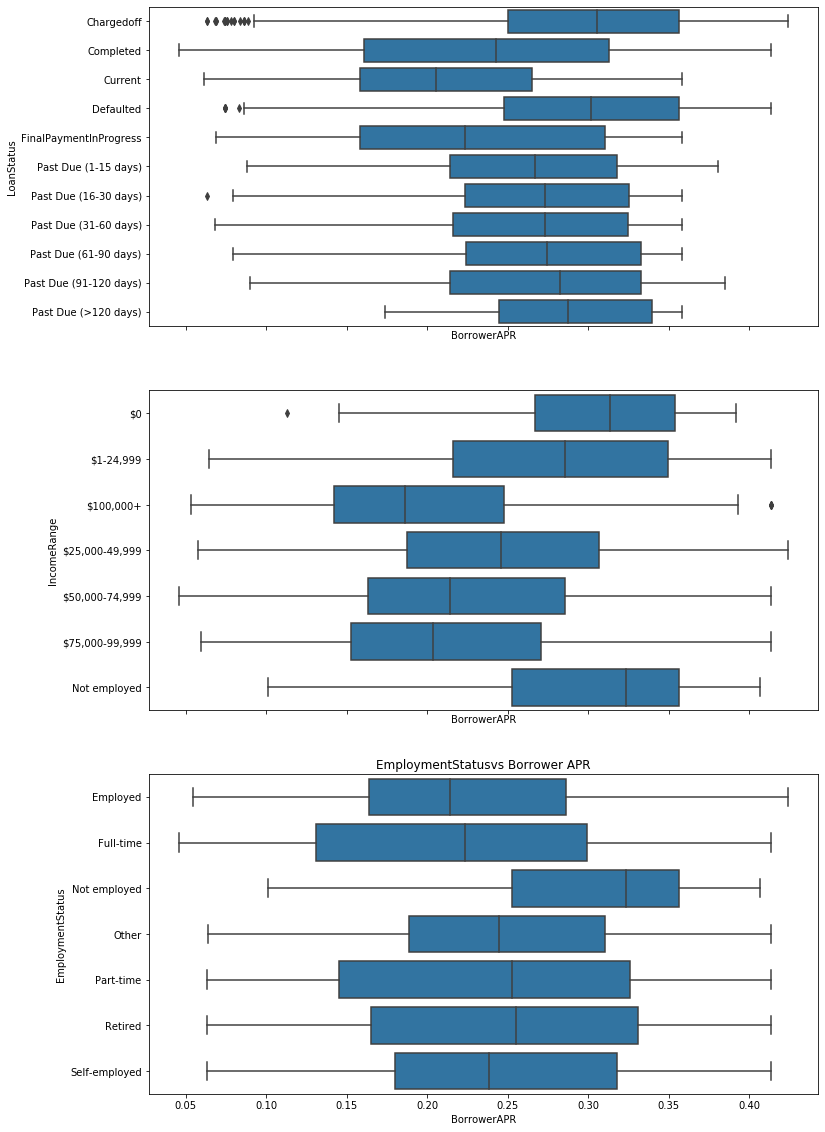

In [44]:
categorical_var.remove('ListingCategory')
categorical_var.remove('IsHomeowner')

#Boxplots for Loanstatus, IncomeRange and EmploymentStatus
fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(12, 20), sharex=True, gridspec_kw=dict(hspace=0.2))
for col in range(len(categorical_var)):
    category = categorical_var[col]
    sb.boxplot(y=category, x="BorrowerAPR", dodge=False, ax=axes[col], color=base_color, data = df_prosper_loan)
    plt.title(category + 'vs Borrower APR')
plt.show()

> **Charged off, Defaulted loans** have been granted with a **higher median Borrower APR** than the other types whereas **current** and **Final payment in progress** have a comparitively **smaller APR rate**.
> Applicants with **Income range more than £100,000** have been granted with a **smaller median APR rate** and applicants who are **not employed** and **£0** income have a **higher APR rate**.

It is interesting to see **Not Employed, applicant with 0 Income Range** have been granted with a loan with a **higher APR rate.**  I'm interested to further investigate to check their Loanstatus, whether they were able to settle the loan or have any arreas. Also to see their motivation to apply for a loan

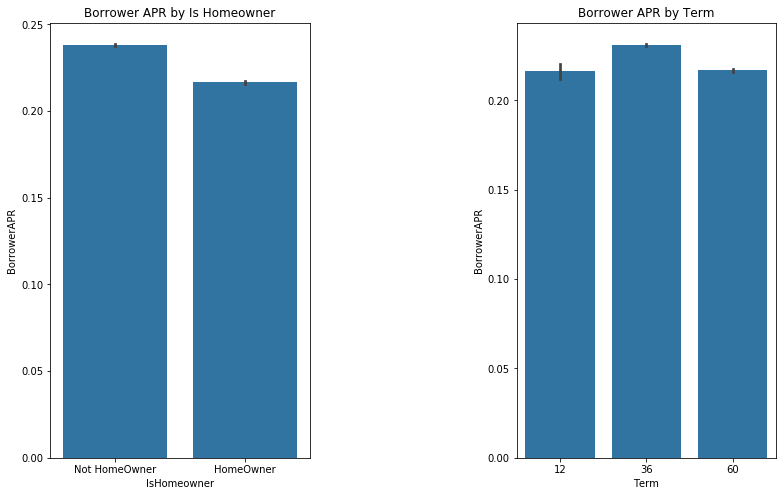

In [45]:
#Create bar plots.
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(13, 8))
fig.subplots_adjust(wspace=0.8)
sb.barplot(x="IsHomeowner", y="BorrowerAPR", ax=axes[0],color = base_color, data = df_prosper_loan).set_title('Borrower APR by Is Homeowner')
sb.barplot(x="Term", y="BorrowerAPR", ax=axes[1], color = base_color, data = df_prosper_loan).set_title('Borrower APR by Term')
plt.show()

>Not being a **Home owener** recieved a **higher APR** rate than a **home owner**. This can be as mortgage arreas has been counted as a debt.

>On average, **36** months term loans have been granted with **higher APR rates.**

Let's investigate more to find about: What is the average loan amount a **Not Employee, Retired applicants** granted?

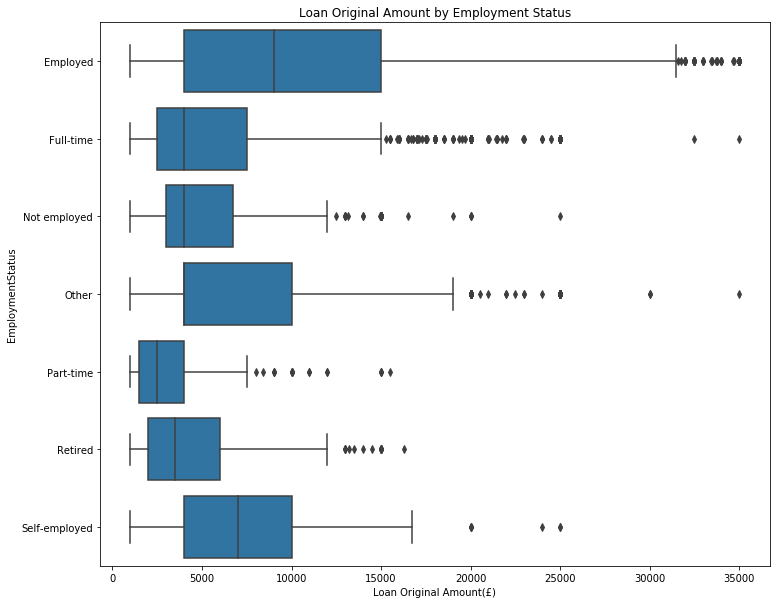

In [46]:
#Create boxplot for Loan Original vs Employment Status
fig,axes = plt.subplots(figsize=(12, 10))
base_color = sb.color_palette()[0]
sb.boxplot(y='EmploymentStatus', x="LoanOriginalAmount", dodge=False, color=base_color, data = df_prosper_loan).set_title('Loan Original Amount by Employment Status')
plt.xlabel('Loan Original Amount(£)')
plt.show()

> **Emlpoyed** applicants have borrowed loan for **maximum of £35,000** with **median of around £10,000**. **Not employed** have borrowed a **maximum of £25,000** with a **median of around £5000**. Interestingly **Not employed** have borrowed a bigger loan amount than those who work for **Part time**. It's suprising to see **Not employees** were able to apply for a bigger amount of loan. It would investigate further in section 3 to see what influence them, may be being a **Home owner, less current credit lines or less current delinquencies**?

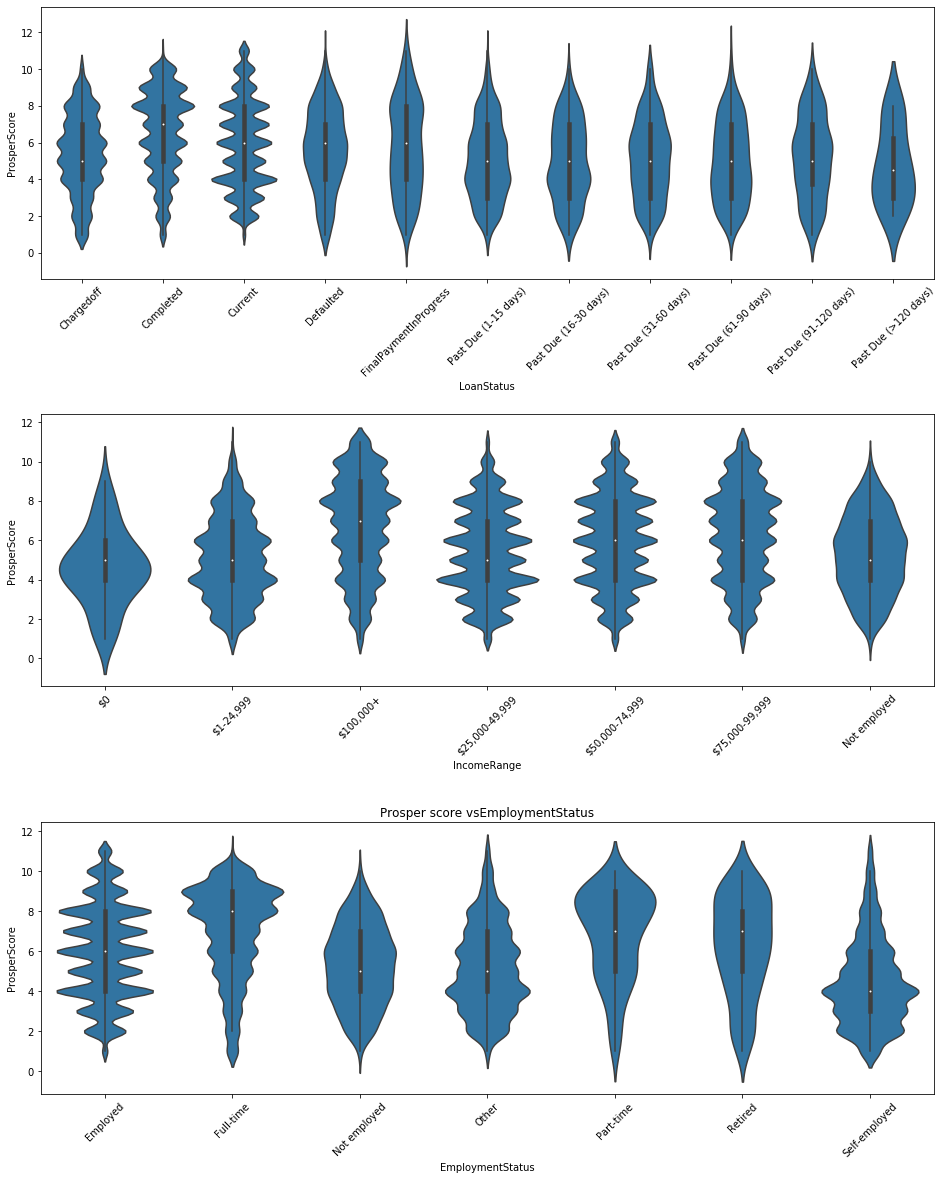

In [48]:
#Create violin plots
fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(16, 20))
fig.subplots_adjust(hspace=0.5)
for col in range(len(categorical_var)):
    category = categorical_var[col]
    plot = sb.violinplot(x=category, y="ProsperScore", dodge=False, ax=axes[col], color=base_color, data = df_prosper_loan)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    plt.title('Prosper score vs'+ category)
plt.show()

> Those loan applicants who **completed** had a **higher median Prosper score** than other types whereas **chargedoff loans** had a lower **median Prosper score**. Interesting fact is **Default** applicants had a **Median Prosper Score** 6, which is a reasonably good.
> **Income range** of **more than £100,000** have a **higher median Prosper score**. Intrestingly applicants who are **not working** and **earning £0** have an **equilavant median Prosper score** of those who earn around **£1-25,000 and 25,000-50,000**.  
> **Not employed** have a **higher median Prosper Score** than **self-employed**. **Full-time** workers have a **highest median of Prosper score**.

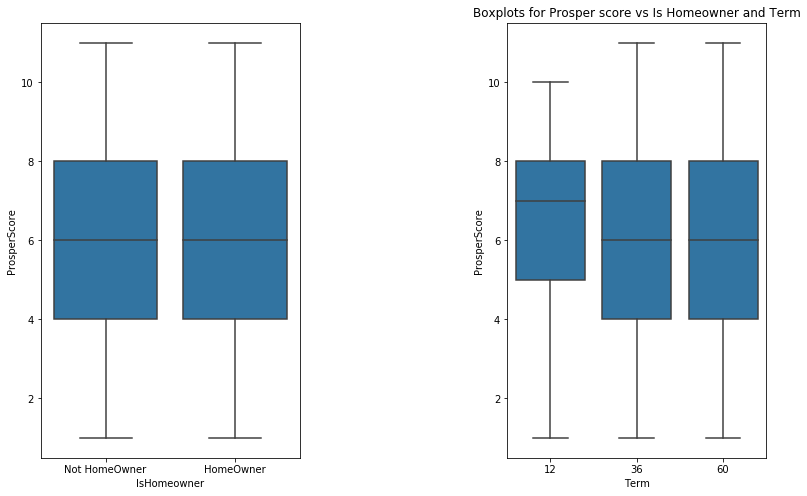

In [49]:
#Create a boxplot
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(13, 8))
fig.subplots_adjust(wspace=0.8)
sb.boxplot(x="IsHomeowner", y="ProsperScore", ax=axes[0],color = base_color, data = df_prosper_loan)
sb.boxplot(x="Term", y="ProsperScore", ax=axes[1], color = base_color, data = df_prosper_loan)
plt.title('Boxplots for Prosper score vs Is Homeowner and Term')
plt.show()

>There is no difference in **median Prosper Score** between **Home owner** and **not a Home owner**. 

>Applicants who are granted a loan for a **shorter term (12 months)** had a **higher median Prosper score** than other loan terms. But **higher loan terms** has the **maximum value of Prosper score**.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
**Borrower APR** and **Prosper Score** have a **moderate negative linear relationship**, which is excpected. Current Credit Lines and Open Revolving Accounts have a **week but negative correlationship** with Borrower APR. As expected above pair depicts Current delinquencies and Total Inquiries have **week positive correlationship** with Borrower APR. Also Borrower APR has **week negative corelationship** with Loan Original Amount.

**Auto, Business, Debt Consolidation, Home Improvement and other** types of loan have a comparitively **higher Borrower APR**. Apparently some among these have a **lower Borrower APR** rate as well for instance **Bussiness loans**. **Baby adaptation** and **Boat** loans have a **lower median rate** and **Cosmetic procedure** has a **higher median APR rate**.

Those loan applicants which are **completed** had a **higher median Prosper score** than other types whereas **chargedoff loans** had a lower **median Prosper score**.  

**Income range** of **more than £100,000** have a **higher median Prosper score**. Intrestingly applicants who are **not working** and **earning £0** have an **equilavant median Prosper score** of those who earn around **£1-25,000 and 25,000-50,000**. Interesting fact is **Default** applicants had a **Median Prosper Score** 6, which is a reasonably good. 

**Not employed** have a **higher median Prosper Score** than **self-employed**. **Full-time** workers have a **higher median of Prosper score**.

Not being a **Home owener** recieved a **higher APR** rate than a **home owner**. This can be as mortgage arreas has been counted as a debt.

On average, **36** months term loans have been granted with **higher APR rates.**

There is **no difference** in **median Prosper Score** between **Home owner** and **not a Home owner**. 
Applicants who are granted a loan for a **shorter term (12 months)** had a **higher median Prosper score** than other loan terms. But **higher loan terms** has the **maximum value of Prosper score**.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

**Emlpoyed applicants** have borrowed loan for maximum of **£35,000** with median of around **£10,000**. Intrestingly, **Not employed** have borrowed a **maximum** of **£25,000** with a **median of around £5000**. And they were able to borrow a bigger loan amount than those who work for Part time. I will further investigate this in section 3.


# Multivariate Exploration

In this section I will try to uncover the questions came up section 2. For that I'm going to extend my investigation on looking at the relationship of Employment with other features inorder to extract deeper insights. End of this part of analysis I will be able to find patterns of,
1. How **Borrower APR** rate changes across various types of **Employment status** with **Prosper score**, Does being **House owner** influence the **Borrower APR**?
2. Does **Loan Original amount** influence **Borrower APR** rate for different  **Employment status**?
3. How **Borrower APR** changes with **Current Delinquencies** of an applicant for different types of their **Employment**?
4. How the **total number of inquiries** at the time the credit profile was pulled affect the **Borower APR** for differnet **Employment Status**?
5. Does **Loan status** depends on the **Employment Status** with their **Borrower APR**?
6. Does different types of **Loan Category** influence the **Borrower APR** for various **Employment Status**?
6. Does loan **Term** affect the **Borrower APR** for different types of **Employment Status**?
7. Does having more number of **Credit Lines** affect the **Borrower APR** for different **Employment Status**?


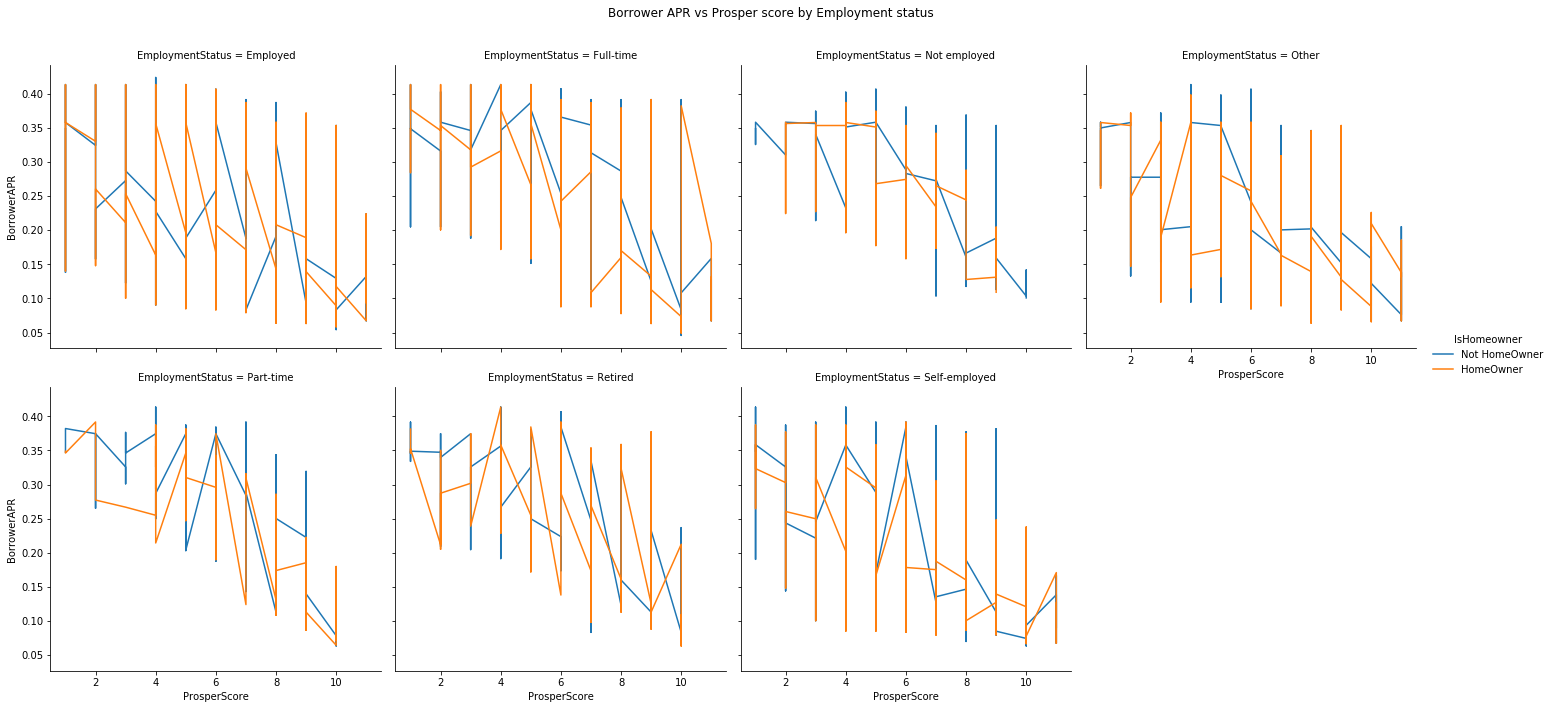

In [50]:
#Create lineplots for Borrower APR vs Prosper Score with Employment status
df_prosper_loan = df_prosper_loan.sort_values('ProsperScore')
g = sb.FacetGrid(df_prosper_loan, col='EmploymentStatus', hue= "IsHomeowner",col_wrap=4, height=5)
g = (g.map(plt.plot,  "ProsperScore","BorrowerAPR").add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Prosper score by Employment status')
plt.show()

> The plots above depicts that **Part time**, **Retired**, **Not employed** linearly correlated **Borrower APR** and **Prosper score** relationship. **APR rate drops** with the **Prosper score** increament. On average **Part time** employers and **Not employer** have a **lower APR** rate when they **don't own a home**. **Employed, Self employed** and **Full time** have a **higher rate** if they are a **Home owner** and **lower rate** if they dont own a home.

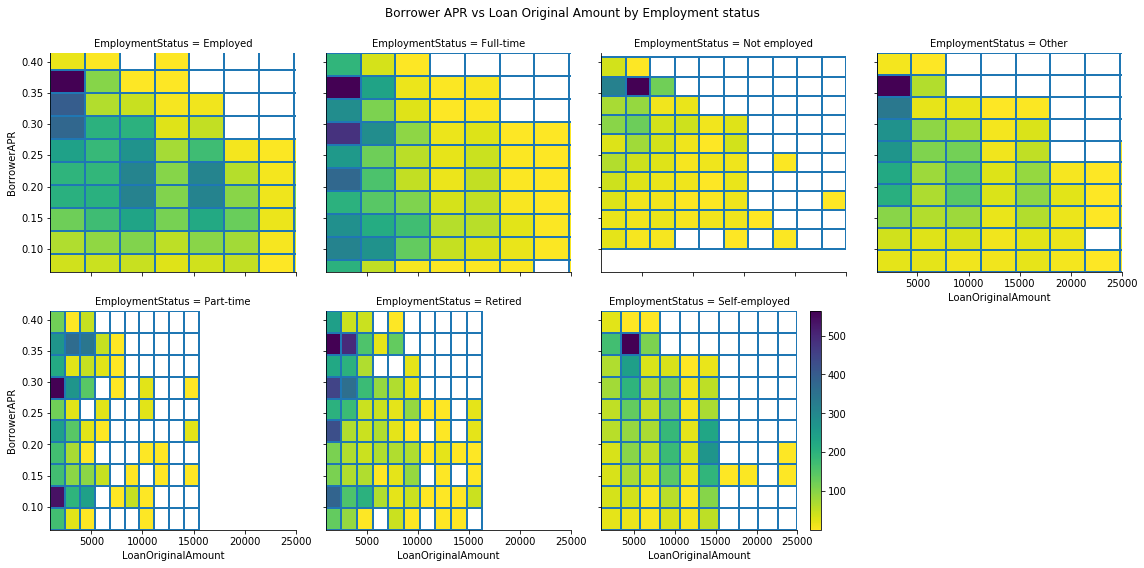

In [51]:
#Creat heatmap for Loan original amount vs APR across Employment status
g = sb.FacetGrid(data = df_prosper_loan, col = 'EmploymentStatus', height = 4.0, col_wrap=4,margin_titles = False)
g.map(plt.hist2d, 'LoanOriginalAmount','BorrowerAPR',cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Loan Original Amount by Employment status')
plt.show()

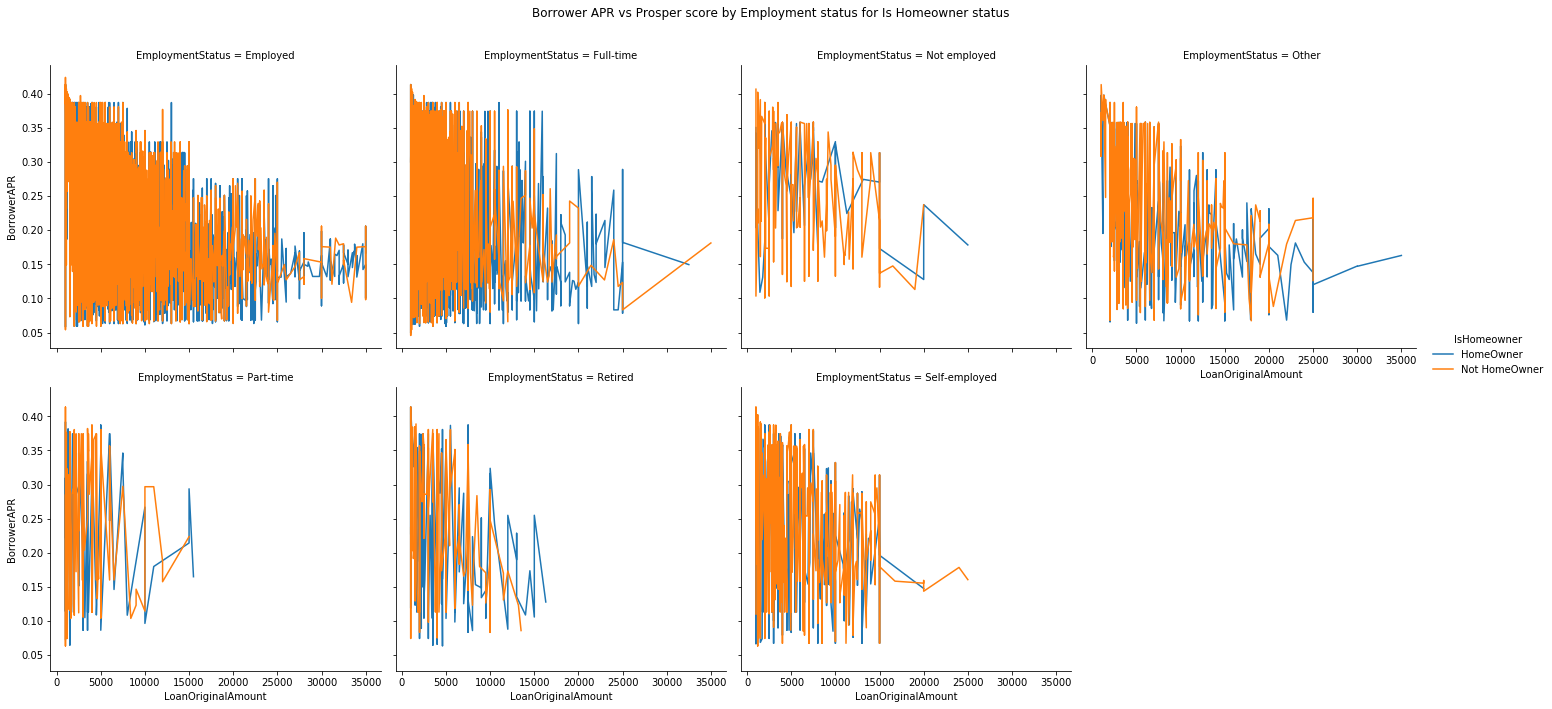

In [52]:
#Create lineplots for Borrower APR vs Prosper Score with Employment status
df_prosper_loan = df_prosper_loan.sort_values('LoanOriginalAmount')
g = sb.FacetGrid(df_prosper_loan, col='EmploymentStatus', hue= "IsHomeowner",col_wrap=4, height=5)
g = (g.map(plt.plot,  "LoanOriginalAmount","BorrowerAPR").add_legend());
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Prosper score by Employment status for Is Homeowner status')
plt.show()

>All most all types of **Employment status** have more applicants in **higher rate of APR** area for **very small amount of loan**. **Not Employed** and **Retired** status have more applicants in **higher rate** for slightly **bigger loan amount**. It is evident **Employed** and **Full time** workers have borrowed comparitively larger loan amount than **Not Employed** and **Retired**. Interestingly some **Not employees** and **Part time** were able to borrow larger loan amount for lower **APR** rate. Second plot proofs that those **Not employees** who borrowed a larger amount were **home owners**. 

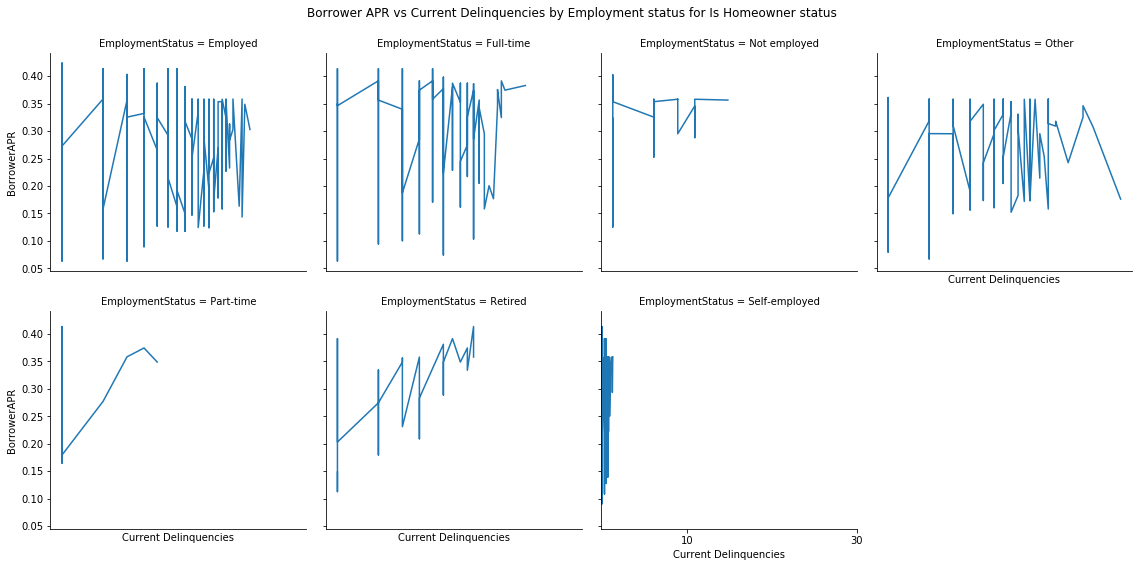

In [53]:
#Create lineplots for Borrower APR vs Current delinquencies for different employment status
df_prosper_loan = df_prosper_loan.sort_values('CurrentDelinquencies')
df_prosper_loan['log_CurrentDelinquencies'] = df_prosper_loan['CurrentDelinquencies'].apply(log_trans)
g = sb.FacetGrid(data = df_prosper_loan, col = 'EmploymentStatus', height = 4, col_wrap=4,
                margin_titles = True)
g.map(plt.plot, 'log_CurrentDelinquencies','BorrowerAPR')
g.set_xlabels('Current Delinquencies')
tick_locs = [10, 30]
plt.xticks(tick_locs, tick_locs)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Current Delinquencies by Employment status for Is Homeowner status')
plt.show()

> Comparitively **Not employed** and **Part time** have recieved a **lower APR** for who have current delinquencies of one. **Employed**, **Full time** and **Other** types have a non linear relationship with  **Current delinquencies** whereas **Retired** has **positive linear ralationship**.   

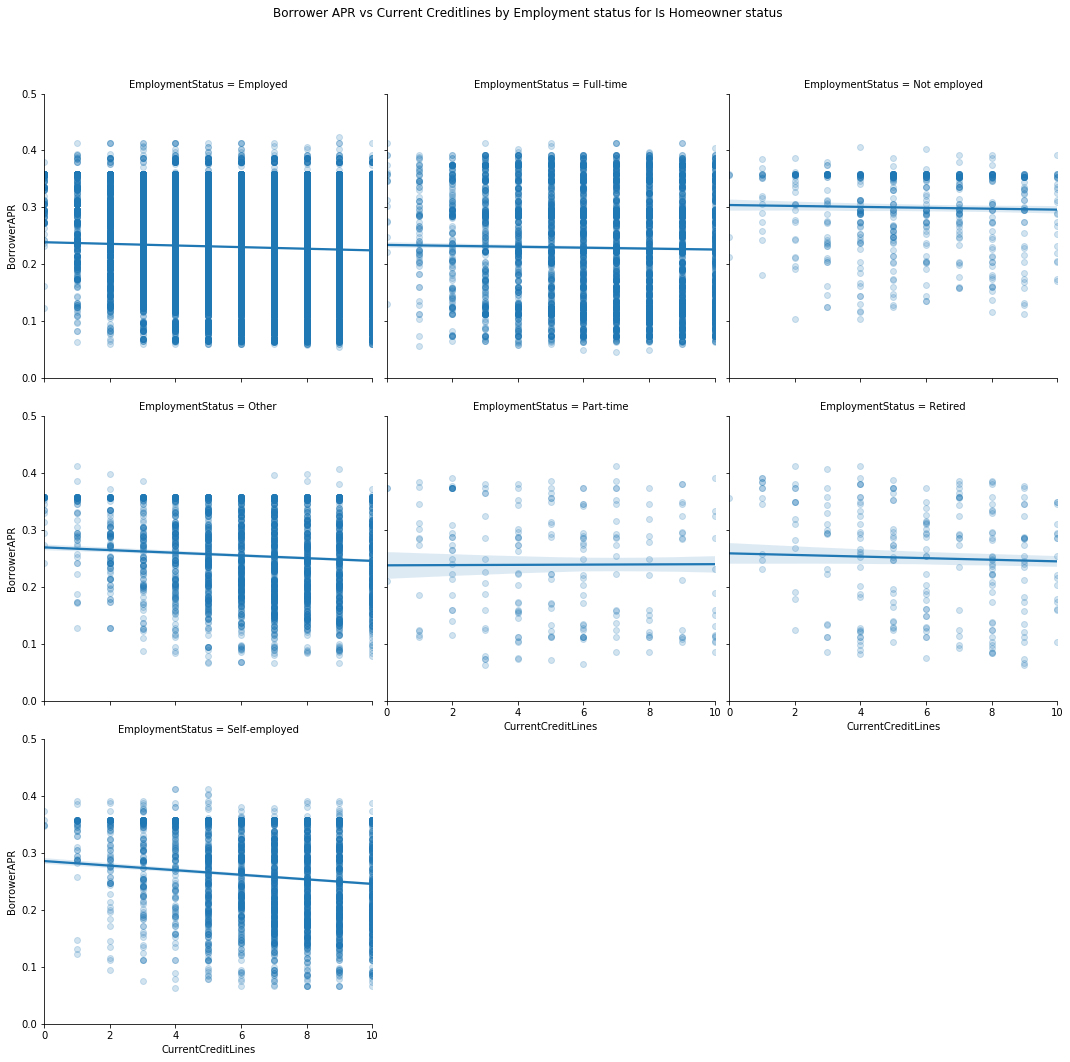

In [54]:
#Create scatter plot for loan status vs APR across Employment status

g = sb.FacetGrid(data = df_prosper_loan, col = 'EmploymentStatus', height = 5, col_wrap=3,
                margin_titles = True)
g.map(sb.regplot, 'CurrentCreditLines','BorrowerAPR',scatter_kws = {'alpha' : 1/5})
plt.ylim(0,0.5)
plt.xlim(0,10)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Current Creditlines by Employment status for Is Homeowner status')
plt.show()

> On average **Not Employed** have recieved a **higher APR** even for **0 current credit lines** with a **very week correlation** whereas **Self employed** shows a **much stronger correlation**.

I'm intrested in looking at whether **Not employees** were able to settle the loan or do they have any **Default** or **Past due** payments? What is the motivation for them to apply for loan?

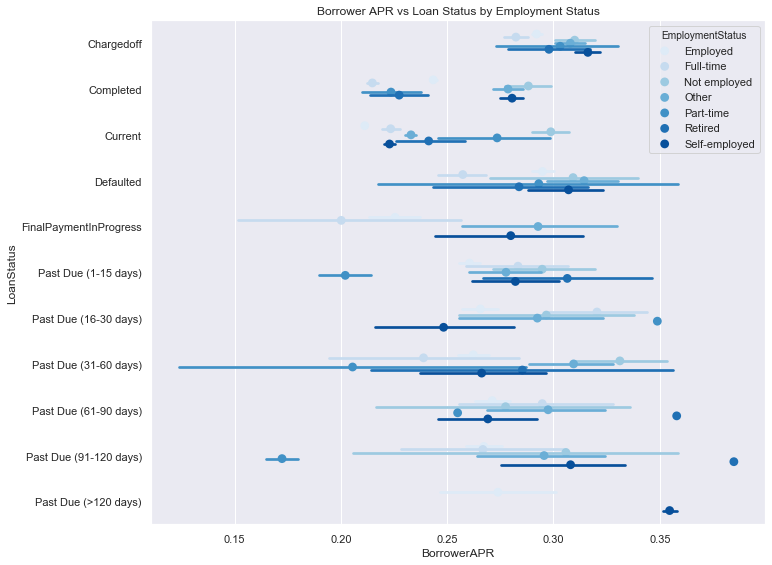

In [55]:
#Create a pointplot for Loan status vs APR across Employment status
sb.set(rc={'figure.figsize':(11.0,8.0)})
g=sb.pointplot(data = df_prosper_loan, y = 'LoanStatus', x = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.subplots_adjust(top=1.0)
plt.title('Borrower APR vs Loan Status by Employment Status')
plt.show()

>**Not Employed Employment Status** has a **larger range** for **Past Due payments** and **Defaulted** loan accounts. **Employed status** have a **less** number of **Defaults** and **Past due** payments comparitively.

In [56]:
#Method to select levels from categorical variables
def select_data(y,i):
    """quick method to select top value counts levels"""
    list_select=[]
    df_prosper_loan[y] = df_prosper_loan[y].astype(str)
    sorted_counts=df_prosper_loan[y].value_counts().nlargest(i)
   
    for i in range(i):
        list_select.append(sorted_counts.index[i])
     
    df_listing = df_prosper_loan[df_prosper_loan[y]==list_select[0]]
    
    for i in range(1,i):
        df_listing = df_listing.append(df_prosper_loan[df_prosper_loan[y]==list_select[i]])
    
    return df_listing
    

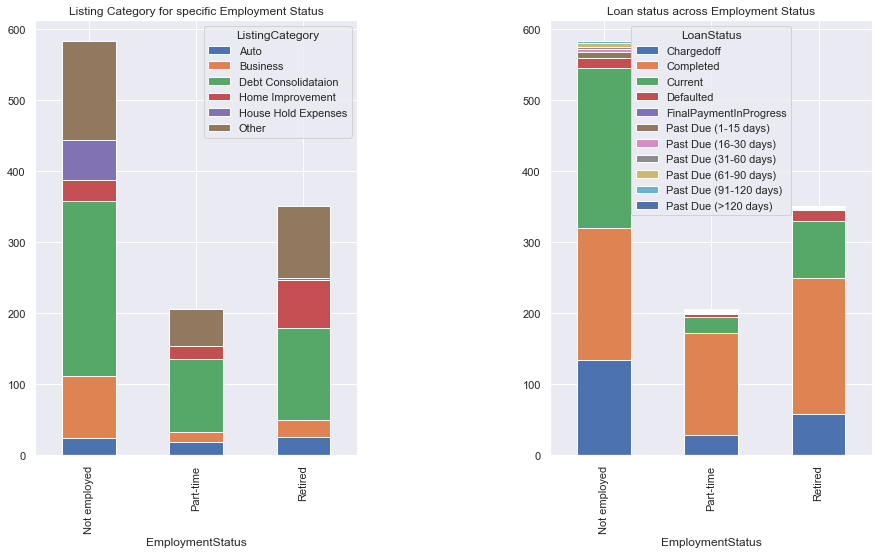

In [57]:
#Create a subset of dataset for Not employed, part time and retired
df_listing = select_data('ListingCategory',7)
df_listing['EmploymentStatus'] = df_listing['EmploymentStatus'].astype(str)
df_listing_new = df_listing[df_listing['EmploymentStatus']=="Not employed"]
df_listing_new = df_listing_new.append(df_listing[df_listing['EmploymentStatus']=="Part-time"])
df_listing_new = df_listing_new.append(df_listing[df_listing['EmploymentStatus']=="Retired"])
df_listing_new.EmploymentStatus.value_counts()

#Create stack bar charts
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 8), sharex=True, gridspec_kw=dict(wspace=0.6))
df_listing_new.groupby(['EmploymentStatus','ListingCategory']).size().unstack().plot(kind='bar',stacked=True,ax=axes[0],title = 'Listing Category for specific Employment Status')
df_listing_new.groupby(['EmploymentStatus','LoanStatus']).size().unstack().plot(kind='bar',stacked=True, ax=axes[1],title ='Loan status across Employment Status')
plt.show()


I have only chosen **Not employed , Part time and Retired** type of employment status as their number of observation are very smaller to other types so they won't be visible in the chart. So to make the chart more interpretable I have chosen the above employment status.

> The bar charts above interpret the purposes of loan application for **Not employed, part-time and retired applicants** are mainly for **Debt consolidataion** and **Business** and **other** which makes sense.  
>**Not employees** have comparitvely **higher** number of  charged off loans.

C:\Users\Premila Deva\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


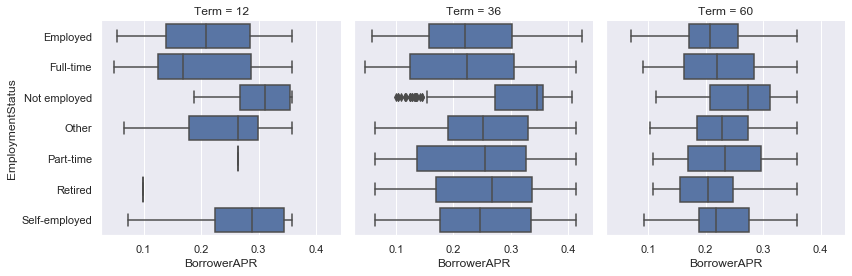

In [62]:
g = sb.FacetGrid(data = df_prosper_loan, col = 'Term', height = 4)
g.map(sb.boxplot, 'BorrowerAPR', 'EmploymentStatus')
plt.show()

>**Not employed** have recieved a **higher median APR rate** across all three terms whereas **Full time** and **Employed** have a **lower rate**.

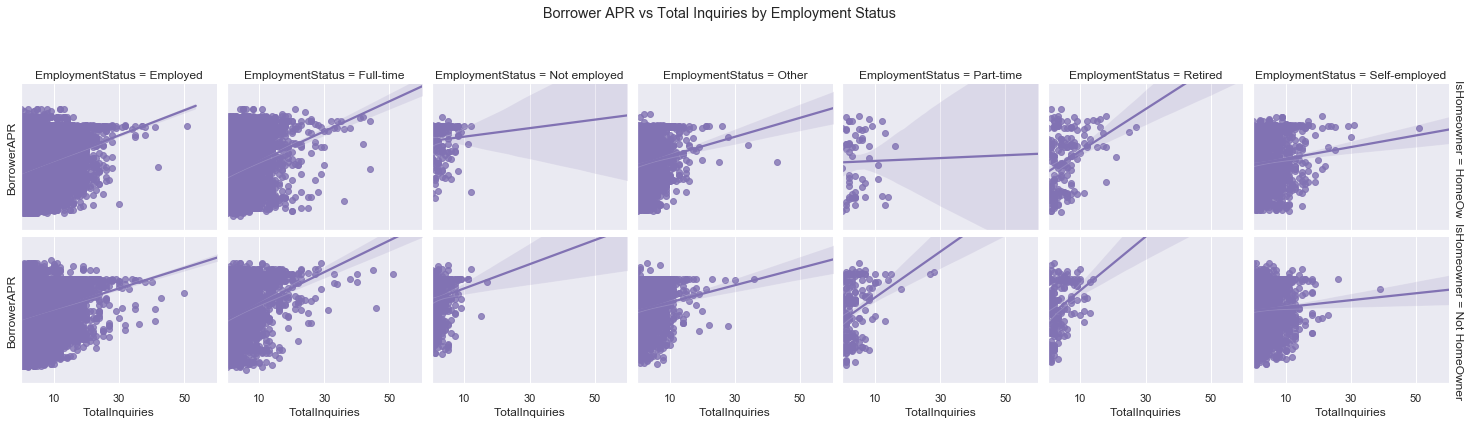

In [59]:
#Scatter for Total inquiries vs APR for different Employment status
g = sb.FacetGrid(df_prosper_loan, col="EmploymentStatus", row="IsHomeowner",
                  margin_titles=True)
g = (g.map(sb.regplot,'TotalInquiries', 'BorrowerAPR', color='m')
      .set(xlim=(0, 60), ylim=(0, 0.5),
           xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.05, hspace=.05))
plt.suptitle('Borrower APR vs Total Inquiries by Employment Status')
plt.subplots_adjust(top=0.8)
plt.show()


> Above scatter plots shows, **Employed, Full time and Retired** have a strong positive relationship with **Total Inquiries** and **APR rate** whereas **Not employed and Self employed** have **moderate positive correlation**. Interestingly **not owing a home** impact more on **APR** rate for who are **Not employed, Part time and Retired**

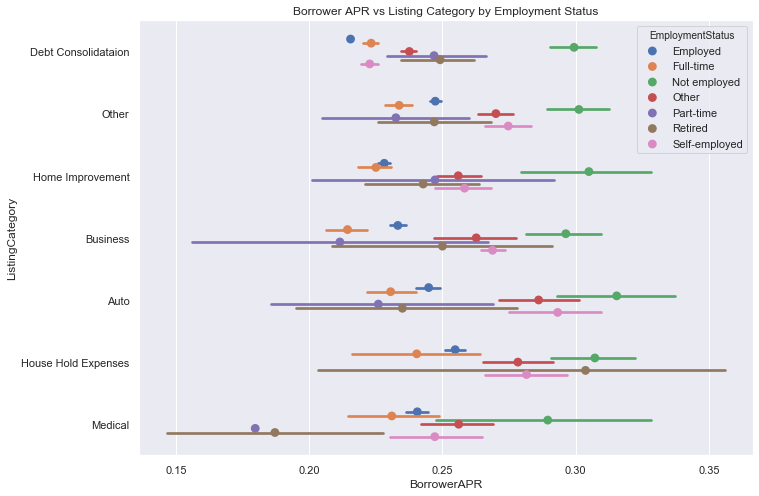

In [60]:
#Create a pointplot for Loan status vs APR across Employment status
df_listing = select_data('ListingCategory',8)
sb.pointplot(data = df_listing, y = 'ListingCategory', x = 'BorrowerAPR', hue = 'EmploymentStatus',
              linestyles = '', dodge = 0.4).set_title('Borrower APR vs Listing Category by Employment Status')
plt.show()

> The plot above depicts, **Not employer** have granted loan with a higher **median APR rate** than all other types. Interestingly **Part time** workers manage to get a comparitively **lower APR** rate for **Business** loans. **Retired** people have borrowed median loan for **lower median APR** rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In conclusion, **Borrower APR** rate has gone down with a **Prosper Score** increasment, which concludes if you have a good **Prosper score** by the time you apply for a loan chances are more likely you would recieve a lower APR rate. Which make sense as **Prosper Score** represent the creditworthiness of an individual. **Borrower APR** is **very high** for a chosen **Prosper Score** for **Not employed, Retired** than other employment types

Likewise other numeric features I have chosen such as **CurrentDelinquencies, Credit lines, Total Inquries** all represents the financial state of an individual. It is evidence from the analysis increasment of these feature values would result **higher Borrower APR**, Specially if the individual is **Not employed, Retired**.

Loan **Term** also the influence the **Borrower APR**, specially **Not employed** have recieved a **higher median APR** rate across all **three terms** whereas **Full time and Employed** have a **lower rate**.

There is a degree of variance in **Borrower APR** for different type of **Loan Status**. Comparitively **Employed and Full time** workers have granted with **lower median Borrower APR**. **Not employer** have granted loan with a **higher median APR** rate than all other types. Interestingly **Part time** workers manage to get a comparitively **lower APR rate** for Business loans. **Retired people** have borrowed medical loan for **lower median APR rate**.

 It is interesting to see **Not Employed**, applicant with **£0** Income Range have been granted with a loan with a **higher APR rate**. **Not Employed Employment** Status has a larger range for **Past Due** payments and **Defaulted loan** accounts. **Employed status** have a **less number** of **Defaults** and **Past due** payments comparitively.

**Not employed, part-time and retired** applicants are mainly for **Debt consolidataion, Business and other** which makes sense. Also most of the **Not employees** are **Home owners** with mortgage on their credit profile or with a proof of bieng a home owner.



### Were there any interesting or surprising interactions between features?

Being a **Home owner** has impacted a higher **Borrower APR** rate generally for all types of **Employment status**, this is sensible as owing an home with a mortgage should counted as a big debt. So this should automatically increase the **Borrower APR** regardless of the **Prosper Score**. On the other hand being a **Home owner** enable to **borrow a large loan amount**, specially for **Not Employers**